In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
import numpy as np
import matplotlib.pyplot as plt
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
%matplotlib inline

# demo中目标检测使用的图片

torch.Size([1, 3, 375, 500])


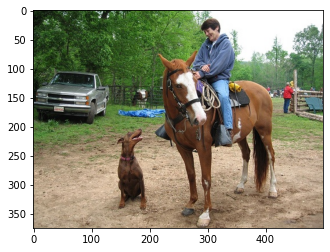

In [2]:
img = read_image('misc/demo.jpg')
img1 = img.astype(int) # float 转换为int
img1 = np.transpose(img1,(1,2,0))
plt.imshow(img1)
img = t.from_numpy(img)[None]
print(img.shape)

In [3]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

Setting up a new session...
Without the incoming socket you cannot receive events from the server or register event handlers to your Visdom client.


You'll need to download pretrained model from [google dirve](https://drive.google.com/open?id=1cQ27LIn-Rig4-Uayzy_gH5-cW-NRGVzY) 
# 1. model converted from chainer

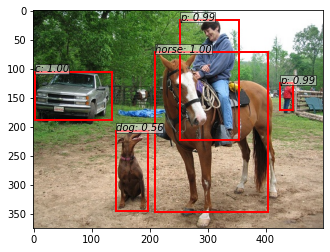

In [4]:
# in this machine the cupy isn't install correctly... 
# so it's a little slow
trainer.load('/Users/13173203690/Desktop/PyTorch/data/chainer_best_model_converted_to_pytorch_0.7053.pth')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it
#我是把threshhold改成0.55才框出的狗狗，改成0.6框不出狗狗

# 2. model trained with torchvision pretrained model

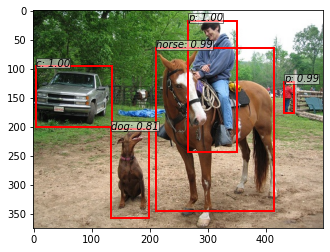

In [5]:
trainer.load('/Users/13173203690/Desktop/PyTorch/data/fasterrcnn_12211511_0.701052458187_torchvision_pretrain.pth')
opt.caffe_pretrain=False # this model was trained from torchvision-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it
#该模型不用改threshold ，就能框出狗狗

# 3. model trained with caffe pretrained model

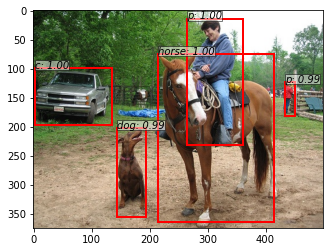

In [6]:
trainer.load('/Users/13173203690/Desktop/PyTorch/data/fasterrcnn_12222105_0.712649824453_caffe_pretrain.pth')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))